In [44]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import datetime

print(pd.__version__)
print(sns.__version__)
print(yf.__version__)

2.2.1
0.13.2
0.2.38


In [45]:
# start = datetime.datetime(2015, 1, 1)
# end = datetime.datetime(2020, 12, 31)

symbol=['NKE','MSFT','AAPL','CVX','IBM','AXP']


In [46]:
df = yf.download( symbol, start='2008-1-1', end='2009-12-31')
df

[*********************100%%**********************]  6 of 6 completed

6 Failed downloads:
['MSFT', 'AXP', 'NKE', 'IBM', 'AAPL', 'CVX']: OperationalError('attempt to write a readonly database')


Empty DataFrame
Columns: [(Adj Close, AAPL), (Adj Close, AXP), (Adj Close, CVX), (Adj Close, IBM), (Adj Close, MSFT), (Adj Close, NKE), (Close, AAPL), (Close, AXP), (Close, CVX), (Close, IBM), (Close, MSFT), (Close, NKE), (High, AAPL), (High, AXP), (High, CVX), (High, IBM), (High, MSFT), (High, NKE), (Low, AAPL), (Low, AXP), (Low, CVX), (Low, IBM), (Low, MSFT), (Low, NKE), (Open, AAPL), (Open, AXP), (Open, CVX), (Open, IBM), (Open, MSFT), (Open, NKE), (Volume, AAPL), (Volume, AXP), (Volume, CVX), (Volume, IBM), (Volume, MSFT), (Volume, NKE)]
Index: []

[0 rows x 36 columns]

In [47]:
df.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'AXP'),
            ('Adj Close',  'CVX'),
            ('Adj Close',  'IBM'),
            ('Adj Close', 'MSFT'),
            ('Adj Close',  'NKE'),
            (    'Close', 'AAPL'),
            (    'Close',  'AXP'),
            (    'Close',  'CVX'),
            (    'Close',  'IBM'),
            (    'Close', 'MSFT'),
            (    'Close',  'NKE'),
            (     'High', 'AAPL'),
            (     'High',  'AXP'),
            (     'High',  'CVX'),
            (     'High',  'IBM'),
            (     'High', 'MSFT'),
            (     'High',  'NKE'),
            (      'Low', 'AAPL'),
            (      'Low',  'AXP'),
            (      'Low',  'CVX'),
            (      'Low',  'IBM'),
            (      'Low', 'MSFT'),
            (      'Low',  'NKE'),
            (     'Open', 'AAPL'),
            (     'Open',  'AXP'),
            (     'Open',  'CVX'),
            (     'Open',  'IBM'),
            (     'O

In [48]:
df['Open']

Ticker,AAPL,AXP,CVX,IBM,MSFT,NKE
Date,,,,,,


In [49]:
stoks_close = df['Close']
stoks_close.head(5)

Ticker,AAPL,AXP,CVX,IBM,MSFT,NKE
Date,,,,,,


In [50]:
stoks_volume = df['Volume']
stoks_volume.head(5)

Ticker,AAPL,AXP,CVX,IBM,MSFT,NKE
Date,,,,,,


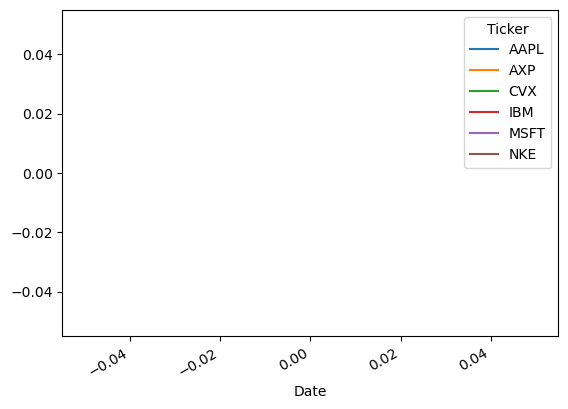

In [51]:
stoks_close.plot();

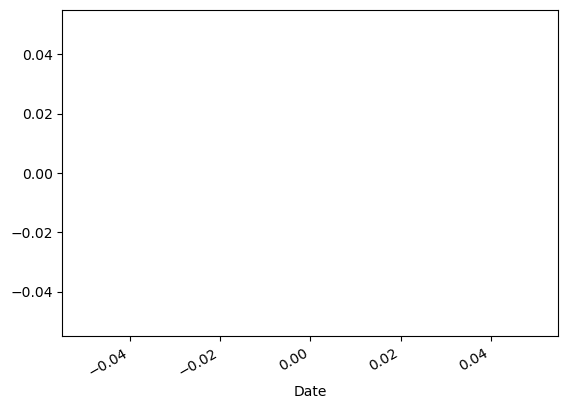

In [52]:
stoks_close['AAPL'].plot();

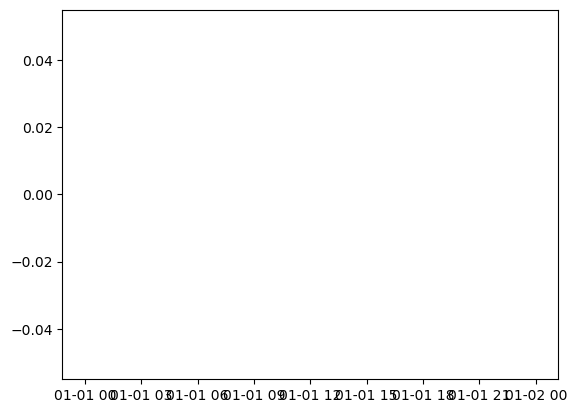

In [53]:
plt.bar(stoks_volume['AAPL'].index,stoks_volume['AAPL'].values, color ='b');

In [54]:
# Здесь разбираемся сами и совмещаем два графика



### Вычисляем ежедневное процентное закрытие
$$ r_t =\dfrac{p_t}{p_{t-1}}-1 $$

In [55]:
daily_pct_na=(stoks_close/stoks_close.shift(1)-1)
daily_pct_na.head()

Ticker,AAPL,AXP,CVX,IBM,MSFT,NKE
Date,,,,,,


In [56]:
#тут внимательнее с данными
daily_pct_0=(stoks_close/stoks_close.shift(1)-1).fillna(0)
daily_pct_0.head()

Ticker,AAPL,AXP,CVX,IBM,MSFT,NKE
Date,,,,,,


### Вычисляем кумулятивную процентную доходность
$$ i_0=r_0=0 $$
$$ i_t=(i_{t-1}+r_t)100 $$

In [57]:
daily_sum_na=(daily_pct_na*100).cumsum()
daily_sum_na.head(5)

Ticker,AAPL,AXP,CVX,IBM,MSFT,NKE
Date,,,,,,


In [58]:
daily_sum_0=(daily_pct_0*100).cumsum()
daily_sum_0.head(5)

Ticker,AAPL,AXP,CVX,IBM,MSFT,NKE
Date,,,,,,


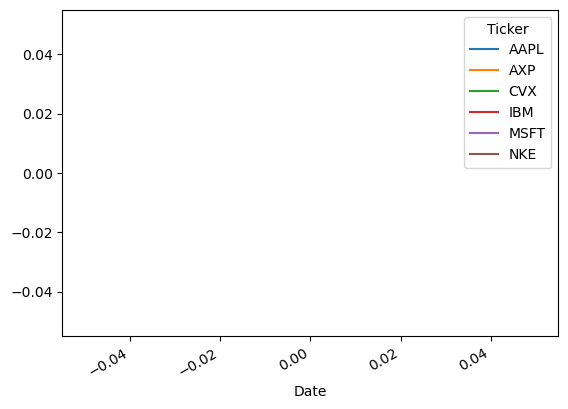

In [59]:
daily_sum_0.plot();

### Вычисляем накопленную процентную доходность
$$ i_0 = 1 $$
$$ i_t = (1+r_t) i_{t-1} $$

In [60]:
daily_prod_na=(1 + daily_pct_na).cumprod()
daily_prod_na.head(5)

Ticker,AAPL,AXP,CVX,IBM,MSFT,NKE
Date,,,,,,


In [61]:
daily_prod_0=(1 + daily_pct_0).cumprod()
daily_prod_0.head(5)

Ticker,AAPL,AXP,CVX,IBM,MSFT,NKE
Date,,,,,,


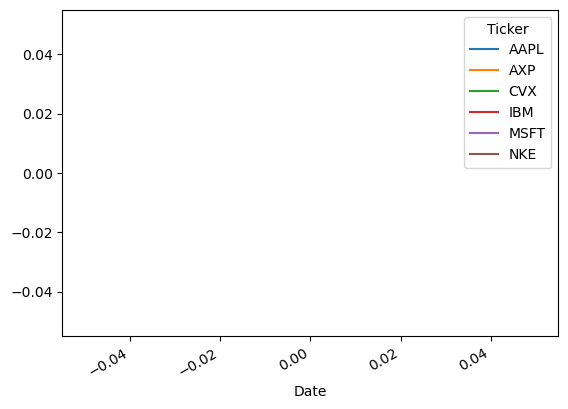

In [62]:
daily_prod_0.plot();

In [63]:
daily_prod_0.asfreq(freq='ME')

Ticker,AAPL,AXP,CVX,IBM,MSFT,NKE
Date,,,,,,


In [64]:
month_sum_q=daily_sum_0.asfreq(freq='BME')
month_sum_q

Ticker,AAPL,AXP,CVX,IBM,MSFT,NKE
Date,,,,,,


ValueError: zero-size array to reduction operation fmin which has no identity

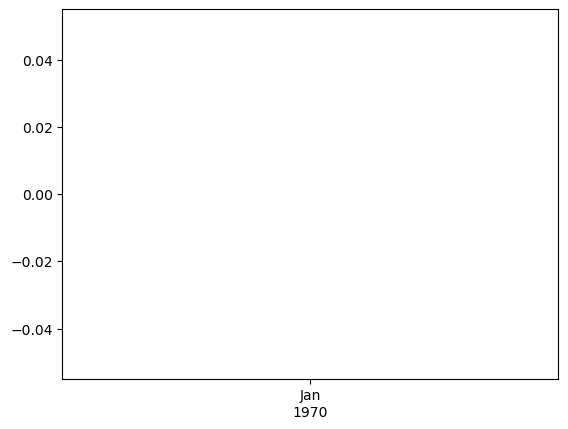

In [65]:
month_sum_q.plot();

In [ ]:
# ВНИМАНИЕ не ОШИБИСЬ С ОПЕРАТОРОМ почему тут стоит LAST, а не sum или prod
# ВНИМАНИЕ почему такой код лучше предидушего?

month_sum=daily_sum_0.resample('MS').first()
month_sum

In [ ]:
month_sum.plot();

In [ ]:
month_prod=daily_prod_0.resample('MS').first()
month_prod

In [ ]:
month_prod.plot();

### Скользящее среднее

In [ ]:
aapl_close=stoks_close['IBM']
ma_30=aapl_close.rolling(30).mean()
ma_90=aapl_close.rolling(90).mean()
result=pd.concat([aapl_close,ma_30,ma_90],axis=1)
result.columns=['IBM','ma_30','ma_90']
result.plot();

In [ ]:
aapl_close=daily_sum_0['AAPL']
msft_close=daily_sum_0['MSFT']

In [ ]:
plt.scatter(aapl_close,aapl_close);

In [ ]:
plt.scatter(aapl_close,msft_close);

In [ ]:
df=pd.concat([aapl_close,msft_close],axis=1)
sns.scatterplot(x="AAPL", y="MSFT",data=df);

In [ ]:
sns.residplot( x = aapl_close, y = msft_close, lowess=True, color="g");

In [ ]:
sns.jointplot(x="AAPL", y="MSFT", data=df, kind="reg", xlim=(-5,50), ylim=(-5,40), color="m", height=7);

### Волатильность

In [ ]:
per=30

vol=daily_pct_0.rolling(per).std()*np.sqrt(per)
vol.plot();

### Оценим риск

In [ ]:
df_risk=pd.concat([daily_pct_0.mean(),daily_pct_0.std()],axis=1)
df_risk.columns=["mean",'std']
df_risk

In [ ]:
sns.scatterplot(x="mean", y="std",data=df_risk,hue=df_risk.index)

### Взаимная корреляция

напомним про клику и диверсификацию портфеля

In [ ]:
corr=daily_pct_0.corr()
corr

In [ ]:
sns.heatmap(corr, annot=True);

In [ ]:
from matplotlib import cm
cmap = cm.coolwarm
#np.fill_diagonal(corr.values, np.nan)
np.fill_diagonal(corr.values, 0)
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap=cmap);